In [1]:
from sklearn import datasets
import numpy as np

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#loading iris dataset setting petal and sepal length as feature matrix and class label as targets
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [6]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [8]:
#Splitting the dataset in test ans train dataset to test aor model's performance on unseen data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 1, stratify = y)
#stratify function ensures all the classes have equal proportion of representaion in both test and train sets

In [10]:
print('Labels count in y - ', np.bincount(y))
print('Labels count in y - ', np.bincount(y_train))
print('Labels count in y - ', np.bincount(y_test))

Labels count in y -  [50 50 50]
Labels count in y -  [35 35 35]
Labels count in y -  [15 15 15]


In [11]:
# performing feature scaling for better preformance of the optimizer
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # fit method will estimate the parameters mean and standars deviation of the sample given
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.linear_model import Perceptron

In [26]:
ppn = Perceptron(eta0 = 0.1, random_state=1, n_iter= 10)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=10, n_jobs=1, penalty=None, random_state=1, shuffle=True,
      verbose=0, warm_start=False)

In [27]:
# Running the Perceptron model on unseen data using predict method
y_pred = ppn.predict(X_test_std)

In [28]:
print('Misclassified Examples - %d' %(y_test != y_pred).sum())

Misclassified Examples - 3


In [31]:
# Calculating performmance metrics of our model
from sklearn.metrics import accuracy_score

In [33]:
print('Accuracy  - %0.3f' %accuracy_score(y_test,y_pred))

Accuracy  - 0.933


In [36]:
#Alternatively we could also have used 
print('Accuracy - %0.3f' %ppn.score(X_test_std, y_test))

Accuracy - 0.933


In [48]:
#helper function for plotting decision
from matplotlib.colors import ListedColormap
def plotDecisionRegion(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1,X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1,X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max, resolution))
    #xx1, xx2 are the coordinates of x and y respectively, we pair each value of the two corresponding matrices and get a grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x =X[y==c1,0],
                    y = X[y==c1,1],
                    alpha =0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = c1, edgecolor='black')
    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c= '', edgecolors='black',
                    alpha=1.0, linewidths=1, marker='o', s=100, label='test set')

C:\Users\ashish\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6512: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\ashish\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6512: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


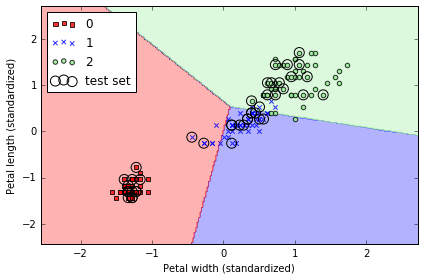

In [49]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plotDecisionRegion(X_combined_std, y_combined, classifier=ppn, test_idx=range(105,150))
plt.ylabel('Petal length (standardized)')
plt.xlabel('Petal width (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()